In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, matplotlib.patches as mpatches, matplotlib.image as image

In [2]:
Perf = pd.read_csv("StudentsPerformance.csv",low_memory=False)

In [3]:
Perf.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [4]:
Perf.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
Perf = Perf.rename(columns={"math score":"math", "reading score":"reading", "writing score":"writing",
                     "race/ethnicity":"ethnicity", "parental level of education":"parentsEducation",
                     "test preparation course":"preparationCourse"})
Perf

,gender,ethnicity,parentsEducation,lunch,preparationCourse,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
Perf.isnull().sum()

gender               0
ethnicity            0
parentsEducation     0
lunch                0
preparationCourse    0
math                 0
reading              0
writing              0
dtype: int64

In [7]:
Perf[Perf.gender=='male'].math.mean()
Perf[Perf.gender=='male'].math.std()
Perf[Perf.gender=='male'].reading.mean()
Perf[Perf.gender=='male'].reading.std()
Perf[Perf.gender=='male'].writing.mean()
Perf[Perf.gender=='male'].writing.sem()

0.6428674231479935

In [8]:
mathMA = Perf[Perf.gender=='male'].math.mean()-Perf[Perf.gender=='male'].math.sem()
mathMB = Perf[Perf.gender=='male'].math.sem() * 2
writingMA = Perf[Perf.gender=='male'].writing.mean()-Perf[Perf.gender=='male'].writing.sem()
writingMB = Perf[Perf.gender=='male'].writing.sem() * 2
readingMA = Perf[Perf.gender=='male'].reading.mean()-Perf[Perf.gender=='male'].reading.sem()
readingMB = Perf[Perf.gender=='male'].reading.sem() *2

mathFA = Perf[Perf.gender=='female'].math.mean()-Perf[Perf.gender=='female'].math.sem()
mathFB = Perf[Perf.gender=='female'].math.sem() * 2
writingFA = Perf[Perf.gender=='female'].writing.mean()-Perf[Perf.gender=='female'].writing.sem()
writingFB = Perf[Perf.gender=='female'].writing.sem() * 2
readingFA = Perf[Perf.gender=='female'].reading.mean()-Perf[Perf.gender=='female'].reading.sem()
readingFB = Perf[Perf.gender=='female'].reading.sem() *2
spaceFA = readingFA - writingFA
spaceFB = writingFA + writingFB
spaceFC = writingFA + spaceFA
spaceFD = spaceFB - spaceFC
print(mathFA, mathFB)
print(writingFA, writingFB)
print(readingFA, readingFB)

62.95254925467337 1.3613107570625247
71.81493656586464 1.3044898026336276
71.97636427837246 1.2634876594712978


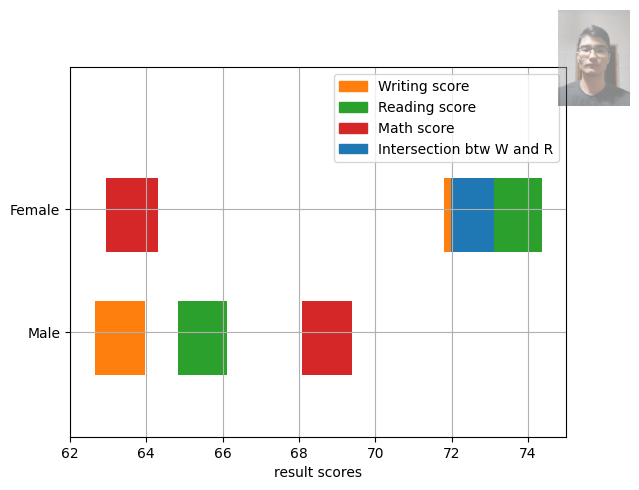

In [9]:
#2-3
fig, ax = plt.subplots()
ax.broken_barh([(writingMA, writingMB), (readingMA, readingMB), (mathMA, mathMB)], (10, 6),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.broken_barh([(writingFA, spaceFA), (spaceFB, readingFB), (mathFA, mathFB), (spaceFC, spaceFD)], (20, 6),
               facecolors=('tab:orange', 'tab:green', 'tab:red', 'tab:blue'))
ax.set_ylim(5, 35)
ax.set_xlim(62, 75)
ax.set_xlabel('result scores')
ax.set_yticks([13.5, 23.5], labels=['Male', 'Female'])
ax.grid(True)
W = mpatches.Patch(color='tab:orange', label='Writing score')
R = mpatches.Patch(color='tab:green', label='Reading score')
M = mpatches.Patch(color='tab:red', label='Math score')
Intersection = mpatches.Patch(color='tab:blue', label='Intersection btw W and R')
plt.legend(handles=[W, R, M, Intersection])
im = image.imread('me.jpg')
newax = fig.add_axes([0.8,0.8,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im,cmap='ocean', alpha=.5)
newax.axis('off')
plt.show()

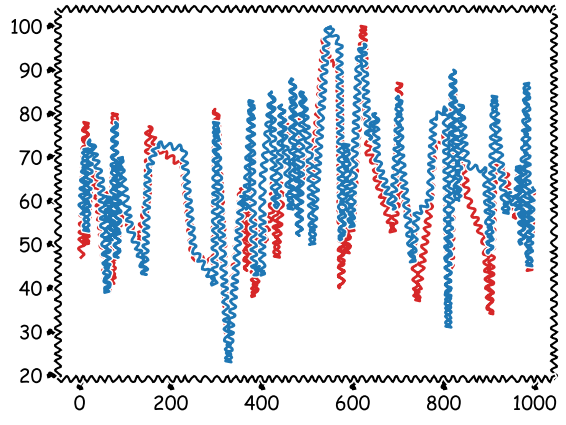

In [120]:
#4
plt.xkcd(scale=3, length=10)
fig, ax = plt.subplots()
ax.plot(Perf[Perf.ethnicity == 'group A'].math, color = 'tab:red')
ax.plot(Perf[Perf.ethnicity == 'group A'].reading, color = 'tab:blue')

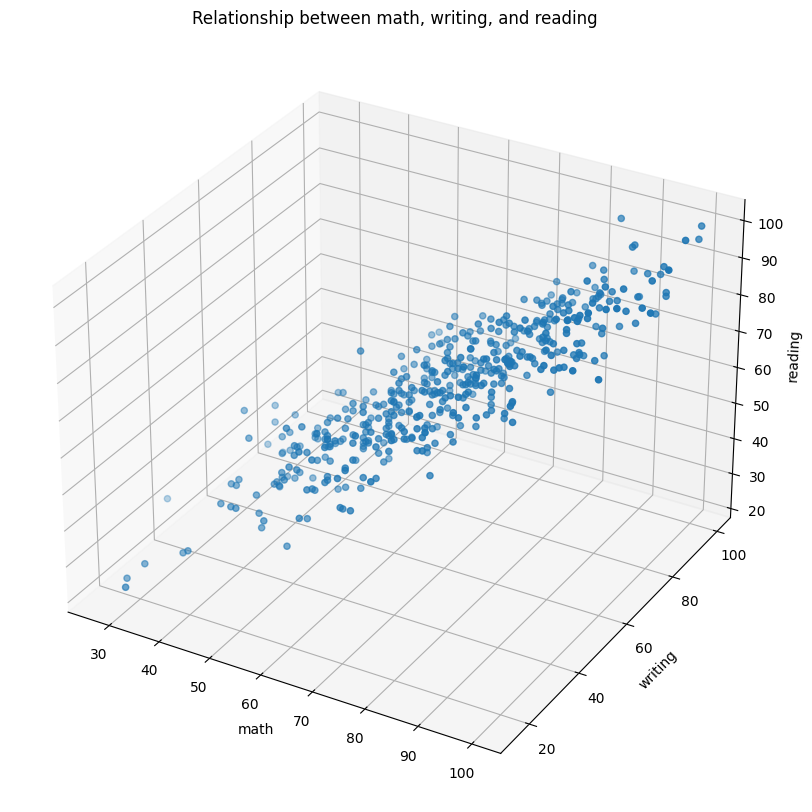

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(Perf[Perf.gender == 'male'].math, Perf[Perf.gender == 'male'].writing, Perf[Perf.gender == 'male'].reading) 
ax.set_xlabel("math")
ax.set_ylabel("writing")
ax.set_zlabel("reading")
ax.set_title("Relationship between math, writing, and reading")
plt.show()

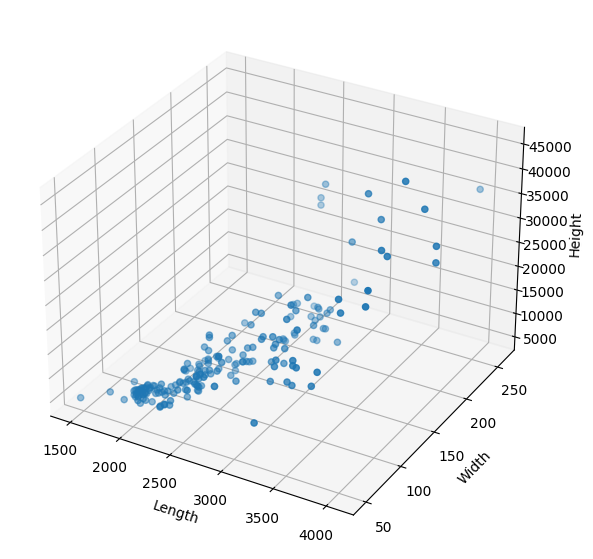

In [11]:
df = pd.read_csv('auto_clean.csv')
%matplotlib inline
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(df['curb-weight'], df['horsepower'], df['price'])
ax.set_xlabel("Length")
ax.set_ylabel("Width")
ax.set_zlabel("Height")
plt.show()

In [12]:
df1 = pd.read_csv("auto-mpg.csv")
df1.loc[336, 'horsepower']=0
df1.loc[354, 'horsepower']=0
df1.loc[374, 'horsepower']=0
df1.horsepower = df1.horsepower.astype(np.float16)


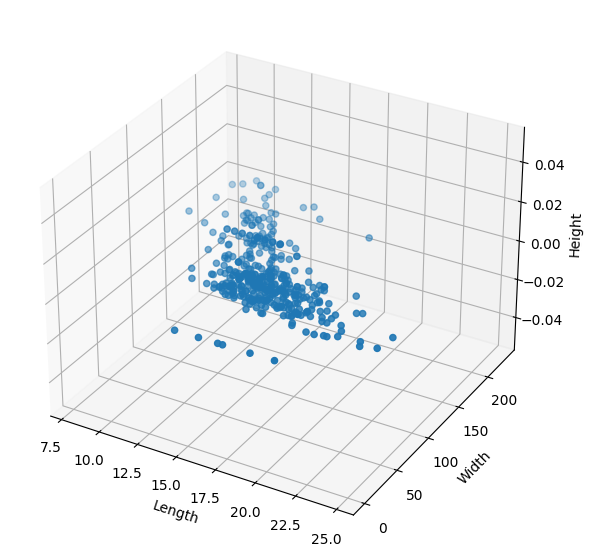

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(df1['acceleration'], df1['horsepower'])
ax.set_xlabel("Length")
ax.set_ylabel("Width")
ax.set_zlabel("Height")
plt.show()

In [14]:
def z_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

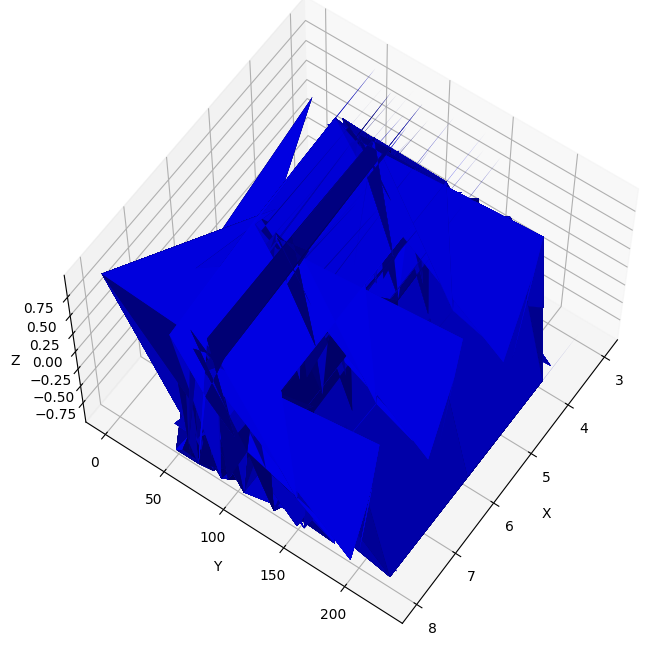

In [30]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

x = df1.cylinders
y = df1.horsepower

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax.plot_surface(X, Y, Z, color = 'blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(60, 35)